In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset (keep top 10,000 most frequent words)
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure equal input length
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


2025-05-05 14:28:52.548024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746455332.853494      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746455332.944485      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout

model = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-05-05 14:29:20.115731: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [4]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5416 - loss: 0.6867 - val_accuracy: 0.7664 - val_loss: 0.5394
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8291 - loss: 0.4179 - val_accuracy: 0.8346 - val_loss: 0.3706
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9243 - loss: 0.2090 - val_accuracy: 0.8608 - val_loss: 0.3296
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9630 - loss: 0.1226 - val_accuracy: 0.8572 - val_loss: 0.3509
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9838 - loss: 0.0670 - val_accuracy: 0.8624 - val_loss: 0.3601
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9960 - loss: 0.0299 - val_accuracy: 0.8702 - val_loss: 0.3667
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9951 - loss: 0.0249 - val_accuracy: 0.8578 - val_loss: 0.4193
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9978 - loss: 0.0155 - val_accuracy: 0.8588 - v

In [5]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8554 - loss: 0.4847
Test Accuracy: 0.86


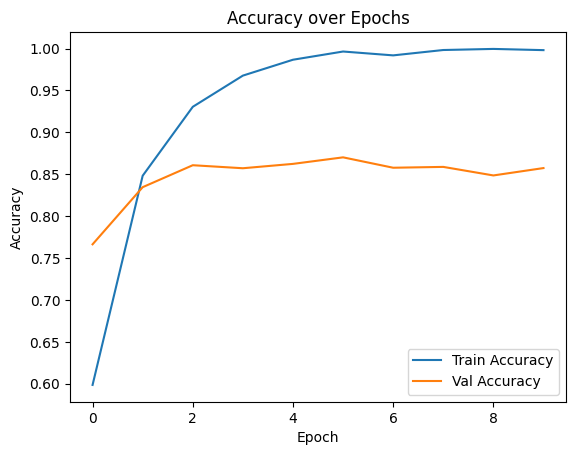

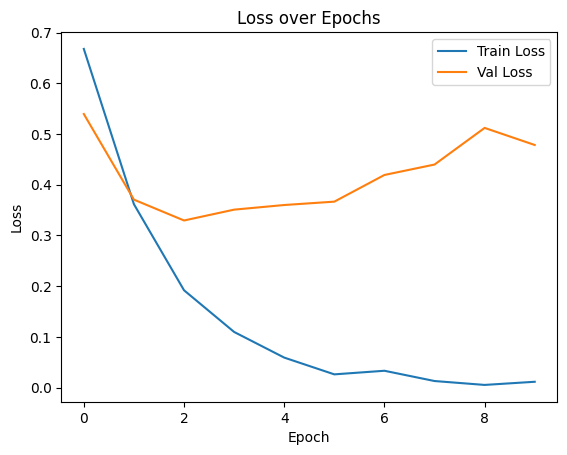

In [6]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

